# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

In [1]:
# For Google Collab use 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [2]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  15.2M      0  0:00:05  0:00:05 --:--:-- 21.0M
total 64
drwx------ 5 root root  4096 Jun 30 14:04 drive
drwx------ 2 root root 53248 Jun  9 13:06 paintings
drwxr-xr-x 1 root root  4096 Jun 15 13:37 sample_data


In [3]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Claude_Monet_26.jpg',
 './paintings/Paul_Cezanne_31.jpg',
 './paintings/Pablo_Picasso_207.jpg',
 './paintings/El_Greco_56.jpg',
 './paintings/Vincent_van_Gogh_774.jpg',
 './paintings/Andrei_Rublev_42.jpg',
 './paintings/Rembrandt_202.jpg',
 './paintings/Joan_Miro_11.jpg',
 './paintings/Amedeo_Modigliani_52.jpg',
 './paintings/Albrecht_DuÌ\x88rer_237.jpg',
 './paintings/Edgar_Degas_19.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_200.jpg',
 './paintings/Amedeo_Modigliani_81.jpg',
 './paintings/Peter_Paul_Rubens_71.jpg',
 './paintings/Vincent_van_Gogh_622.jpg',
 './paintings/Paul_Gauguin_252.jpg',
 './paintings/Edvard_Munch_59.jpg',
 './paintings/Vincent_van_Gogh_370.jpg',
 './paintings/Pieter_Bruegel_95.jpg',
 './paintings/Pierre-Auguste_Renoir_108.jpg',
 './paintings/Edgar_Degas_596.jpg',
 './paintings/Sandro_Botticelli_51.jpg',
 './paintings/Sandro_Botticelli_106.jpg',
 './paintings/Joan_Miro_91.jpg',
 './paintings/Frida_Kahlo_7.jpg',
 './paintings/Amedeo_Modigliani_1

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

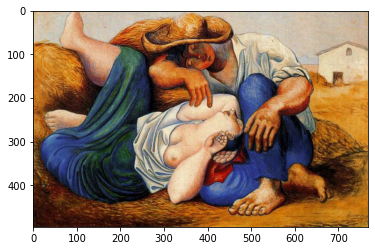

In [4]:
# YOUR CODE HERE
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open(dataset_paths[53])
plt.imshow(im)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [5]:
# YOUR CODE HERE
import cv2

pic = cv2.imread(dataset_paths[53])
pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)

img_shape = pic.shape
print(img_shape)
img_dim = pic.ndim
print(img_dim)

(496, 768, 3)
3


❓ **What was in the image above?**

In [6]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

# is_portrait = True
is_portrait = False

is_colored_image = True
#is_colored_image = False

"""!!!Attention!!! Working in Google Collab and locally produce different images at index 53!"""

'!!!Attention!!! Working in Google Collab and locally produce different images at index 53!'

In [7]:
!pip install nbresult

     |████████████████████████████████| 716kB 7.6MB/s 
  Created wheel for nbresult: filename=nbresult-0.0.4-cp37-none-any.whl size=3619 sha256=0613c7d009719925e9cc21639cf0db290086e169e7623300d7e6328cf675a134
  Stored in directory: /root/.cache/pip/wheels/1f/bd/a7/efe5a3338f916d9ca8bea419cdbda1e5b3512583ec0ab3f401
Successfully built nbresult


In [8]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [9]:
# YOUR CODE HERE
dataset_images = []
for img in dataset_paths:
    pic = cv2.imread(img)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    dataset_images.append(pic)
    
dataset_images

[array([[[154, 125, 107],
         [127, 100,  81],
         [121,  94,  75],
         ...,
         [108,  86,  65],
         [123, 103,  79],
         [ 50,  30,   6]],
 
        [[156, 125, 107],
         [151, 122, 104],
         [150, 123, 104],
         ...,
         [111,  90,  69],
         [129, 111,  87],
         [ 86,  68,  44]],
 
        [[143, 110,  93],
         [129,  98,  80],
         [120,  93,  76],
         ...,
         [119, 103,  80],
         [121, 107,  81],
         [110,  96,  70]],
 
        ...,
 
        [[171, 132,  91],
         [165, 127,  91],
         [139, 105,  78],
         ...,
         [203, 176, 147],
         [200, 174, 147],
         [206, 181, 151]],
 
        [[148, 109,  68],
         [160, 124,  88],
         [151, 119,  94],
         ...,
         [232, 203, 173],
         [240, 211, 181],
         [250, 223, 193]],
 
        [[126,  89,  44],
         [156, 123,  82],
         [169, 138, 109],
         ...,
         [175, 142, 111],
  

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [10]:
# YOUR CODE HERE
dims = set()
for img in dataset_images:
    dims.add(img.ndim)
print('Observed number of dimensions:', dims)

"I have no idea how to explain that all pictures have 3 color channels"

Observed number of dimensions: {3}


'I have no idea how to explain that all pictures have 3 color channels'

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [11]:
from tqdm import tqdm
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1031464.15it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [12]:
# YOUR CODE HERE
import numpy as np
import tensorflow as tf

dataset_resized = np.empty((len(dataset_images), 120, 100, 3))

for i, img in enumerate(dataset_images):
    dataset_resized[i] = tf.image.resize(img, [120, 100])
    
dataset_resized.shape

(1085, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [13]:
# YOUR CODE HERE
dataset_scaled = dataset_resized / 255
dataset_scaled[0]

array([[[0.55130837, 0.44989657, 0.37457075],
        [0.58629707, 0.48206503, 0.37955227],
        [0.56922954, 0.5048341 , 0.54419687],
        ...,
        [0.52325404, 0.44977366, 0.42139399],
        [0.42707932, 0.31782624, 0.25445715],
        [0.45483946, 0.37979745, 0.29955519]],

       [[0.58778776, 0.46955246, 0.41743481],
        [0.4892088 , 0.40913577, 0.35542794],
        [0.50781621, 0.42105147, 0.39863482],
        ...,
        [0.59671158, 0.58906453, 0.56725111],
        [0.53930048, 0.48965331, 0.43629085],
        [0.4705    , 0.44326321, 0.36413733]],

       [[0.53437009, 0.42502777, 0.36538316],
        [0.443384  , 0.36992322, 0.31945181],
        [0.47289219, 0.37928925, 0.30851719],
        ...,
        [0.3494868 , 0.35177436, 0.31999332],
        [0.44723098, 0.42329308, 0.37705123],
        [0.58599082, 0.48904479, 0.42525479]],

       ...,

       [[0.63624597, 0.49584243, 0.33407913],
        [0.51764838, 0.36008639, 0.19654807],
        [0.6758947 , 0

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [14]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

Text(0.5, 1.0, 'Original image')

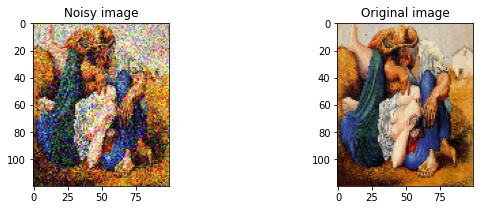

In [15]:
# YOUR CODE HERE
fig, axs = plt.subplots(1, 2, figsize=(10,3))

axs[0].imshow(dataset_noisy[53])
axs[0].set_title('Noisy image')

axs[1].imshow(dataset_scaled[53])
axs[1].set_title('Original image')

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.2)

In [17]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [19]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [21]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(120, 100, 3)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dimensions),
        ]
    )
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 59, 49, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 24, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 44544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6000)              267270000 
Total params: 267,289,392
Trainable params: 267,289,392
Non-trainable params: 0
_________________________________________________________________


👉 **Test your encoder below**

In [22]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 6000)              267289392 
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 267,296,067
Trainable params: 267,296,067
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [25]:
# YOUR CODE HERE
autoencoder.compile(optimizer='adam', loss='mae', metrics='mae')

es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = autoencoder.fit(X_train, Y_train,
                          batch_size=16,
                          epochs = 1000,
                          callbacks=es,
                          validation_data=(X_train, Y_train),
                          verbose=1
                          )

Epoch 1/1000
55/55 [==============================] - 36s 89ms/step - loss: 0.2215 - mae: 0.2215 - val_loss: 0.1679 - val_mae: 0.1679
Epoch 2/1000
55/55 [==============================] - 5s 83ms/step - loss: 0.1419 - mae: 0.1419 - val_loss: 0.1219 - val_mae: 0.1219
Epoch 3/1000
55/55 [==============================] - 4s 82ms/step - loss: 0.1154 - mae: 0.1154 - val_loss: 0.1019 - val_mae: 0.1019
Epoch 4/1000
55/55 [==============================] - 5s 83ms/step - loss: 0.0990 - mae: 0.0990 - val_loss: 0.0910 - val_mae: 0.0910
Epoch 5/1000
55/55 [==============================] - 5s 83ms/step - loss: 0.0897 - mae: 0.0897 - val_loss: 0.0850 - val_mae: 0.0850
Epoch 6/1000
55/55 [==============================] - 5s 83ms/step - loss: 0.0845 - mae: 0.0845 - val_loss: 0.0808 - val_mae: 0.0808
Epoch 7/1000
55/55 [==============================] - 5s 82ms/step - loss: 0.0790 - mae: 0.0790 - val_loss: 0.0734 - val_mae: 0.0734
Epoch 8/1000
55/55 [==============================] - 5s 82ms/step -

In [27]:
score_baseline = history.history['val_mae'][-1]
score_baseline

0.04448952525854111

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [28]:
# YOUR CODE HERE
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

autoencoder.compile(optimizer=optimizer, loss='mse', metrics='mae')

es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = autoencoder.fit(X_train, Y_train,
                          batch_size=16,
                          epochs = 1000,
                          callbacks=es,
                          validation_split=0.3,
                          verbose=1
                          )

Epoch 1/1000
38/38 [==============================] - 4s 87ms/step - loss: 0.0845 - mae: 0.2316 - val_loss: 0.0497 - val_mae: 0.1787
Epoch 2/1000
38/38 [==============================] - 3s 77ms/step - loss: 0.0424 - mae: 0.1631 - val_loss: 0.0392 - val_mae: 0.1618
Epoch 3/1000
38/38 [==============================] - 3s 77ms/step - loss: 0.0290 - mae: 0.1323 - val_loss: 0.0312 - val_mae: 0.1403
Epoch 4/1000
38/38 [==============================] - 3s 77ms/step - loss: 0.0227 - mae: 0.1162 - val_loss: 0.0281 - val_mae: 0.1287
Epoch 5/1000
38/38 [==============================] - 3s 77ms/step - loss: 0.0188 - mae: 0.1052 - val_loss: 0.0266 - val_mae: 0.1218
Epoch 6/1000
38/38 [==============================] - 3s 78ms/step - loss: 0.0160 - mae: 0.0960 - val_loss: 0.0256 - val_mae: 0.1192
Epoch 7/1000
38/38 [==============================] - 3s 77ms/step - loss: 0.0131 - mae: 0.0858 - val_loss: 0.0238 - val_mae: 0.1152
Epoch 8/1000
38/38 [==============================] - 3s 77ms/step - 

❓ **Plot your training and validation loss at each epoch using the cell below**

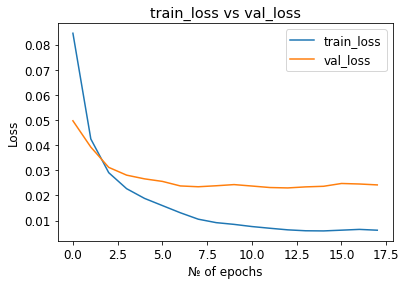

In [30]:
# Plot below your train/val loss history
plt.rc('font', size=12)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.title("train_loss vs val_loss")
plt.xlabel("№ of epochs")
plt.ylabel("Loss")


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [33]:
# YOUR CODE HERE
score_test = autoencoder.evaluate(X_test, Y_test)
score_test

7/7 [==============================] - 0s 23ms/step - loss: 0.0271 - mae: 0.1207


[0.027072928845882416, 0.12073426693677902]

In [36]:
Y_pred = autoencoder.predict(dataset_noisy)
Y_pred.shape

(1085, 120, 100, 3)

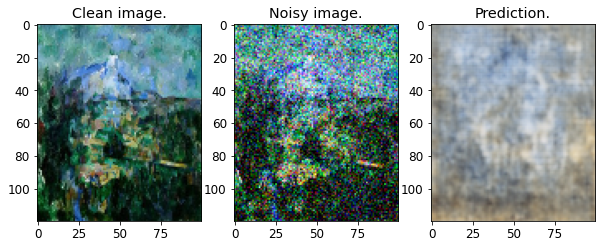

In [37]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()